# Proyecto final


*   Analia Cueva 00216525
*   Agustín Lozano 00322070
*   Rafaela Bucheli 00212966

# Imports

In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Cargar el data set

In [ ]:
#Importamos el Dataset
encoding = 'ISO-8859-1'
df = pd.read_csv("/content/PublicHospitalDataset.csv",encoding=encoding)

In [ ]:
#Visualizamos la base de datos
df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


Podemos ver que existen valores nulos y algunas columnas tienen información no correspondiente

# 1. Exploratory Data Analysis

In [ ]:
#Mostrar el tamaño del Dataset
print("Shape:\n",df.shape, "\n")

#Mostrar el tipo de datos
print("Data Types:\n",df.dtypes, "\n")

#Mostrar los valores nulos
print("Nulls:\n",df.isnull().sum(), "\n")

#Describir la info de cada columna
print("Description:\n",df.describe(), "\n")

Shape:
 (5110, 11) 

Data Types:
 Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object 

Nulls:
 Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64 

Description:
        Hypertension  Heart Disease  Avg_glucose_level           Bmi  \
count   5110.000000    5110.000000        5110.000000   4909.000000   
mean       0.097456       0.054012         106.147677     61.463720   
std        0.296607       0.226063          45.283560   1140.662468   
min        0.000000       0.000000 

Nuestro dataset tiene 5110 filas y 11 columnas. Bmi tiene 201 valores nulos por lo que esta columna tiene menos datos que el resto y además tiene una desviación estandar excesiva de 1140. Esto puede deverse a que su valor máximo es de 40000 lo cual es un valor irreal para esta métrica. Debemos normalizar los datos al cambiar la edad a valores enteros.

In [ ]:
#Cambiamos el tipo de datos de Age por enteros
df['Age'] = df['Age'].astype(int)

#Mostrar el tipo de datos
print("Data Types:\n",df.dtypes, "\n")

Data Types:
 Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                    int64
Stroke                 int64
dtype: object 



In [ ]:
#Comporbamos que los datos sean los correctos viendo los valores únicos que está teniendo cada variable
print("Valores unicos Hypertension:", df["Hypertension"].unique())
print("Valores unicos Heart Disease:", df["Heart Disease"].unique())
print("Valores unicos Married:", df["Married"].unique())
print("Valores unicos Work:", df["Work"].unique())
print("Valores unicos Residence:", df["Residence"].unique())
print("Valores unicos Smoking:", df["Smoking"].unique())
print("Valores unicos Gender:", df["Gender"].unique())
print("Valores unicos Stroke:", df["Stroke"].unique())

Valores unicos Hypertension: [0 1]
Valores unicos Heart Disease: [1 0]
Valores unicos Married: ['Yes' 'No']
Valores unicos Work: ['Private' 'Self-employed' 'k\x96sdh-k' 'Govt_job' 'sdsd-i' 'children'
 'Never_worked' 'dsfsdf' 'sdfsdf']
Valores unicos Residence: ['Urban' 'Rural']
Valores unicos Smoking: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Valores unicos Gender: ['Male' 'Female' 'Other']
Valores unicos Stroke: [1 0]


Podemos ver que en Work hay datos que no corresponden por lo que deben ser eliminados. Además, las personas que tienen "Unknown" en smoke no nos aportan información importante a nuestro modelo ya que es como si tuvieramos una celda vacía. Por intuición, debemos chequear si la cantidad de personas que se identifican como "otro" es significativa para mantenerla o no en el modelo

## Limpieza de datos

In [ ]:
#Imprimimos los datos que tengan "Otro" en género
df[df["Gender"]=="Other"]

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
3116,0,0,No,Private,Rural,143.33,22.4,formerly smoked,Other,26,0


Podemos ver que existe solo una persona que se identifique como Otro en Género por lo que, no aportan información a nuestro Data set

In [ ]:
#Eliminamos los datos que no deberían ir en Work
df_clean=df[df["Work"]!="k\x96sdh-k"]
df_clean=df_clean[df_clean["Work"]!="sdsd-i"]
df_clean=df_clean[df_clean["Work"]!="dsfsdf"]
df_clean=df_clean[df_clean["Work"]!="sdfsdf"]

#Eliminamos las entradas de Otro en Género
df_clean=df_clean[df_clean["Gender"]!="Other"]

#Eliminamos los datos que dicen Unknown en Smoking
df_clean=df_clean[df_clean["Smoking"]!="Unknown"]

#Eliminamos las entradas de 40000 en Bmi
df_clean=df_clean[df_clean["Bmi"]<=70]

#Cambiamos el nombre del dataset limpio a df
df=df_clean

#Imprimimos los valores unicos para comprobar que se haya hecho la limpieza adecuadamente
print("Valores unicos Work:", df["Work"].unique())
print("Valores unicos Gender:", df["Gender"].unique())
print("Valores unicos Smoking:", df["Smoking"].unique())

Valores unicos Work: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Valores unicos Gender: ['Male' 'Female']
Valores unicos Smoking: ['formerly smoked' 'never smoked' 'smokes']


La limpieza esta realizada correctamente

In [ ]:
#Vemos el tamaño de la base de datos
print("Shape:\n",df.shape, "\n")

#Describimos la información
print("Description:\n",df.describe(),"\n")

Shape:
 (3414, 11) 

Description:
        Hypertension  Heart Disease  Avg_glucose_level          Bmi  \
count   3414.000000    3414.000000        3414.000000  3414.000000   
mean       0.118629       0.060047         108.320155    30.243820   
std        0.323399       0.237608          47.675245     7.140235   
min        0.000000       0.000000          55.120000    11.500000   
25%        0.000000       0.000000          77.267500    25.225000   
50%        0.000000       0.000000          92.415000    29.100000   
75%        0.000000       0.000000         116.185000    34.100000   
max        1.000000       1.000000         271.740000    64.800000   

               Age       Stroke  
count  3414.000000  3414.000000  
mean     48.669596     0.052431  
std      18.841757     0.222928  
min      10.000000     0.000000  
25%      34.000000     0.000000  
50%      50.000000     0.000000  
75%      63.000000     0.000000  
max      82.000000     1.000000   



Ahora nuestro Dataset es de 3559 filas y 11 columnas. Podemos ver que el modelo solo analiza las variables cuantitativas por lo que debemos cambiar al mismo formato las que son cualitativas

## Visualizamos los datos de cada variable

<Axes: xlabel='Gender', ylabel='Count'>

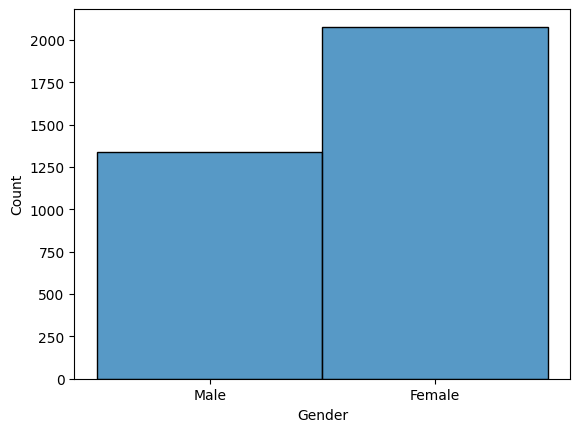

In [ ]:
#Creamos un histograma de Gender para analizar los datos
sns.histplot(df['Gender'])

<Axes: xlabel='Married', ylabel='Count'>

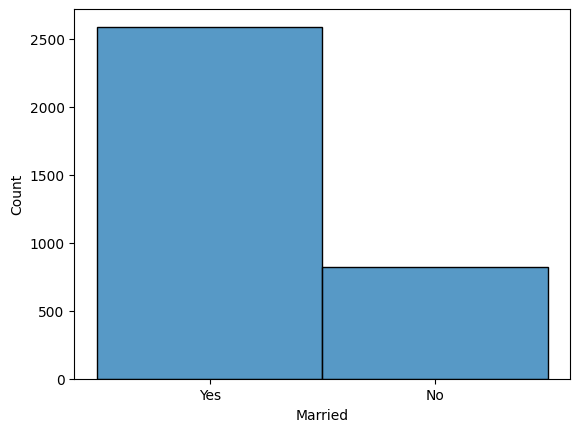

In [ ]:
#Creamos un histograma de Married para analizar los datos
sns.histplot(df['Married'])

<Axes: xlabel='Work', ylabel='Count'>

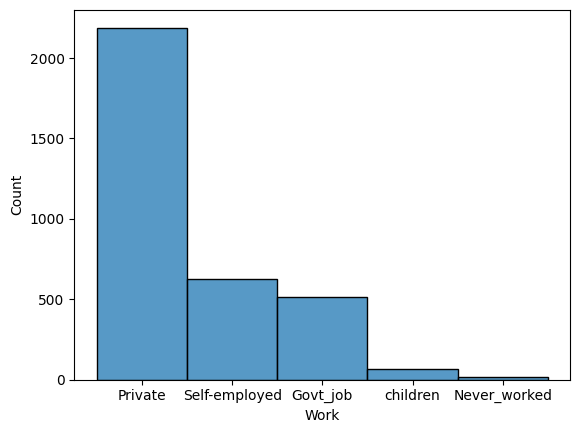

In [ ]:
#Creamos un histograma de Work para analizar los datos
sns.histplot(df['Work'])

<Axes: xlabel='Residence', ylabel='Count'>

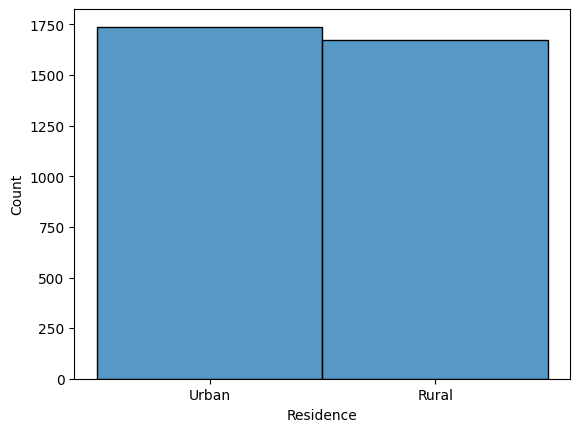

In [ ]:
#Creamos un histograma de Residence para analizar los datos
sns.histplot(df['Residence'])

<Axes: xlabel='Smoking', ylabel='Count'>

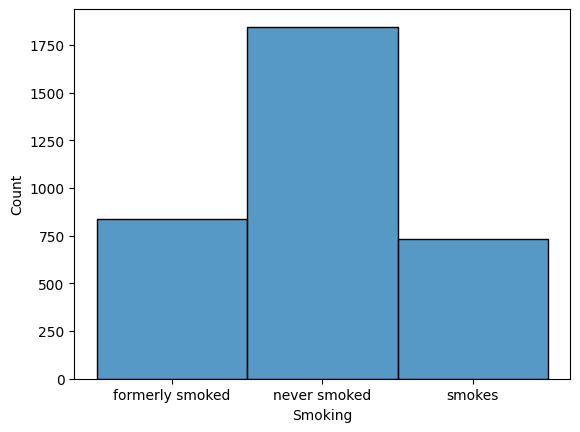

In [ ]:
#Creamos un histograma de Smoking para analizar los datos
sns.histplot(df['Smoking'])

## Labeling encoding y variables dummies

In [ ]:
#Cambiamos las variables categóricas que tienen 2  niveles a labeling encoding
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Residence'] = df['Residence'].map({'Rural': 1, 'Urban': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

#Cambiamos el nombre de Residencia a rural para comprender mejor el modelo
df = df.rename(columns={'Residence': 'Rural'})

#Imprimimos el dataset
df

,Hypertension,Heart Disease,Married,Work,Rural,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,1,Private,0,228.69,36.6,formerly smoked,0,67,1
2,0,1,1,Private,1,105.92,32.5,never smoked,0,80,1
3,0,0,1,Private,0,171.23,34.4,smokes,1,49,1
4,1,0,1,Self-employed,1,174.12,24.0,never smoked,1,79,1
5,0,0,1,Private,0,186.21,29.0,formerly smoked,0,81,1
...,...,...,...,...,...,...,...,...,...,...,...
5096,0,0,1,Govt_job,1,76.62,28.2,never smoked,0,57,0
5100,1,0,1,Self-employed,1,71.97,28.3,never smoked,0,82,0
5102,0,0,1,Private,1,77.93,21.7,never smoked,1,57,0
5107,0,0,1,Self-employed,1,82.99,30.6,never smoked,1,35,0


Para que Python entienda las variables categóricas de 2 niveles, cambiamos a estas utilizando labeling encoding y cambiando los valores por 1 y 0. No utilizamos variables dummies para no tener demasiadas variables y que se dificulte el análisis del mismo

In [ ]:
#Creamos variables Dummies en Work
Dummies = pd.get_dummies(df['Work'])
df = pd.concat([df, Dummies], axis=1)

#Creamos variables Dummies en smoking
Dummies = pd.get_dummies(df['Smoking'])
df = pd.concat([df, Dummies], axis=1)

# Mostramos el resultado
df

,Hypertension,Heart Disease,Married,Work,Rural,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1,1,Private,0,228.69,36.6,formerly smoked,0,67,1,0,0,1,0,0,1,0,0
2,0,1,1,Private,1,105.92,32.5,never smoked,0,80,1,0,0,1,0,0,0,1,0
3,0,0,1,Private,0,171.23,34.4,smokes,1,49,1,0,0,1,0,0,0,0,1
4,1,0,1,Self-employed,1,174.12,24.0,never smoked,1,79,1,0,0,0,1,0,0,1,0
5,0,0,1,Private,0,186.21,29.0,formerly smoked,0,81,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,0,0,1,Govt_job,1,76.62,28.2,never smoked,0,57,0,1,0,0,0,0,0,1,0
5100,1,0,1,Self-employed,1,71.97,28.3,never smoked,0,82,0,0,0,0,1,0,0,1,0
5102,0,0,1,Private,1,77.93,21.7,never smoked,1,57,0,0,0,1,0,0,0,1,0
5107,0,0,1,Self-employed,1,82.99,30.6,never smoked,1,35,0,0,0,0,1,0,0,1,0


Podemos ver que se crearon nuevas celdas por cada tipo de trabajo y categoría de Fumador. Aumentamos columnas a 19

In [ ]:
#Eliminamos la columna de Work y Smoking
df=df.drop(['Work'],axis=1)
df=df.drop(['Smoking'],axis=1)

#Imprimimos el Dataset
df

,Hypertension,Heart Disease,Married,Rural,Avg_glucose_level,Bmi,Gender,Age,Stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1,1,0,228.69,36.6,0,67,1,0,0,1,0,0,1,0,0
2,0,1,1,1,105.92,32.5,0,80,1,0,0,1,0,0,0,1,0
3,0,0,1,0,171.23,34.4,1,49,1,0,0,1,0,0,0,0,1
4,1,0,1,1,174.12,24.0,1,79,1,0,0,0,1,0,0,1,0
5,0,0,1,0,186.21,29.0,0,81,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,0,0,1,1,76.62,28.2,0,57,0,1,0,0,0,0,0,1,0
5100,1,0,1,1,71.97,28.3,0,82,0,0,0,0,1,0,0,1,0
5102,0,0,1,1,77.93,21.7,1,57,0,0,0,1,0,0,0,1,0
5107,0,0,1,1,82.99,30.6,1,35,0,0,0,0,1,0,0,1,0


Ya no necesitamos las columnas de Work y Smoking porque ya fueron creadas las variables dummies de cada una. Por lo que eliminamos estas columnas y ahora tenemos 17

## Matriz de correlación

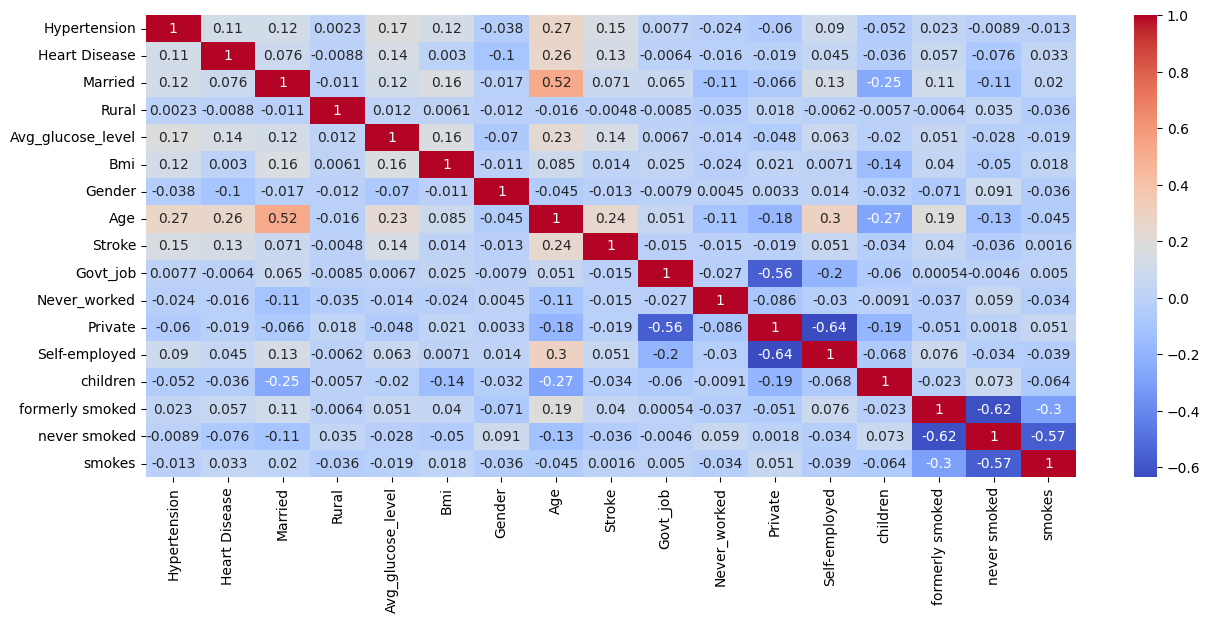

In [ ]:
#Creamos una matriz de correlación de todas mis variables
corr_matrix = df.corr()

#Ajustamos el tamaño
plt.figure(figsize=(15,6))

#Elegimos el tipo de gráfico de correlación
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#Imprimimos el gráfico
plt.show()

Podemos ver que Bmi tiene muy poca relación. Esto puede ser debido a que tiene valores atípicos. Es necesario hacer un análisis de si es necesario eliminar los 201 datos nulos o si la columna de Bmi puede ser quitada. Si eliminamos solo los valores nulos, podemos estar eliminando información importante del resto de variables

In [ ]:
#Eliminamos los valores nulos de la columna bmi en un nuevo dataset df_nn
df["Bmi"] = pd.to_numeric(df["Bmi"],errors = "coerce")
df_nn = df.dropna(subset = ["Bmi"])

<Axes: xlabel='Bmi', ylabel='Count'>

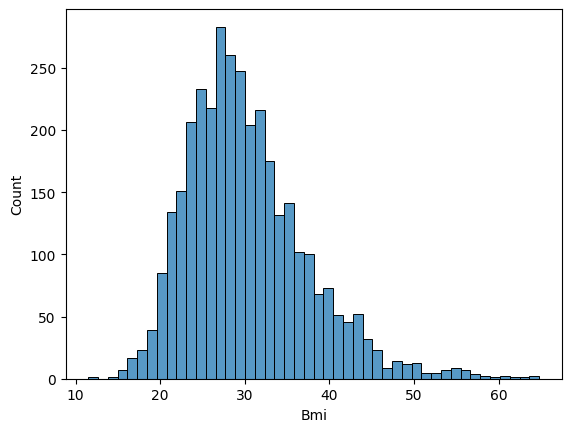

In [ ]:
# Creamos un histograma de Bmi
sns.histplot(df_nn['Bmi'])

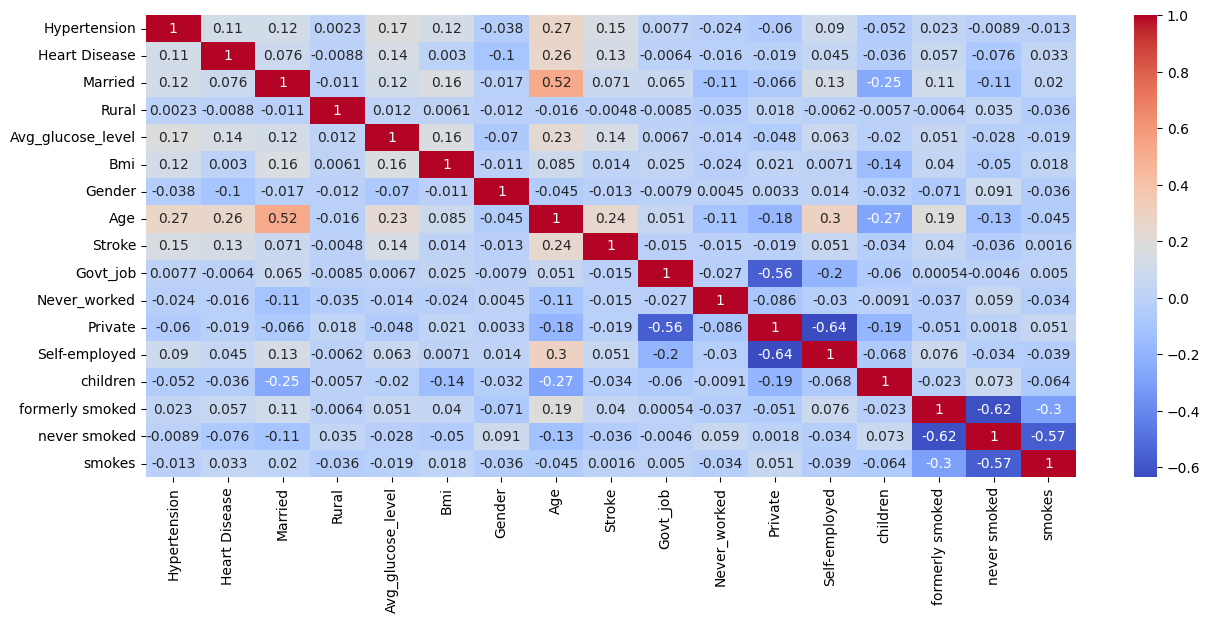

In [ ]:
#Creamos una matriz de correlación de todas mis variables
corr_matrixnn = df_nn.corr()

#Ajustamos el tamaño
plt.figure(figsize=(15,6))

#Elegimos el tipo de gráfico de correlación
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#Mostramos el gráfico
plt.show()

Podemos ver que Bmi sigue teniendo la misma correlación y las variables que más afectan a mi variable de respuesta son Hypertensión, Heart Disease, Avg_glucose_level y Age por lo que el resto de veriables las eliminamos

## Variables predictivas

In [ ]:
#Importamos el Dataset
encoding = 'ISO-8859-1'
df = pd.read_csv("/content/PublicHospitalDataset.csv",encoding=encoding)

Recuperamos el df inicial porque la limpieza de datos se las hizo por datos que estaban en las variables no predictivas. Como estas variables no va a ser usadas, no es necesario haber hecho esa limpieza

In [ ]:
#Eliminamos las columnas que no son variables predictivas
df=df.drop(['Bmi'],axis=1)
df=df.drop(['Gender'],axis=1)
df=df.drop(['Residence'],axis=1)
df=df.drop(['Married'],axis=1)
df=df.drop(['Work'],axis=1)
df=df.drop(['Smoking'],axis=1)

#Imprimimos el tamaño y la descripción de los datos
print("Shape:\n",df.shape, "\n")
print("Description:\n",df.describe(),"\n")

Shape:
 (5110, 5) 

Description:
        Hypertension  Heart Disease  Avg_glucose_level          Age  \
count   5110.000000    5110.000000        5110.000000  5110.000000   
mean       0.097456       0.054012         106.147677    43.226614   
std        0.296607       0.226063          45.283560    22.612647   
min        0.000000       0.000000          55.120000     0.080000   
25%        0.000000       0.000000          77.245000    25.000000   
50%        0.000000       0.000000          91.885000    45.000000   
75%        0.000000       0.000000         114.090000    61.000000   
max        1.000000       1.000000         271.740000    82.000000   

            Stroke  
count  5110.000000  
mean      0.048728  
std       0.215320  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000   



<Axes: xlabel='Hypertension', ylabel='Count'>

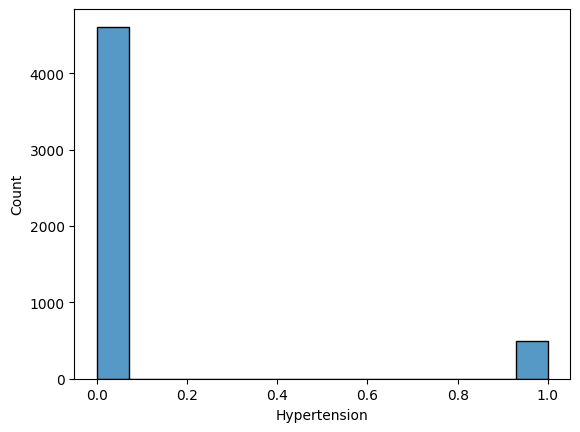

In [ ]:
#Creamos un histograma de Hypertension para analizar los datos
sns.histplot(df['Hypertension'])

<Axes: xlabel='Heart Disease', ylabel='Count'>

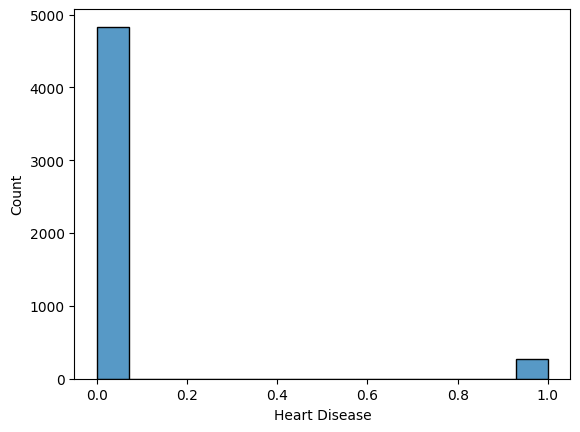

In [ ]:
#Creamos un histograma de Heart Disease para analizar los datos
sns.histplot(df['Heart Disease'])

<Axes: xlabel='Avg_glucose_level', ylabel='Count'>

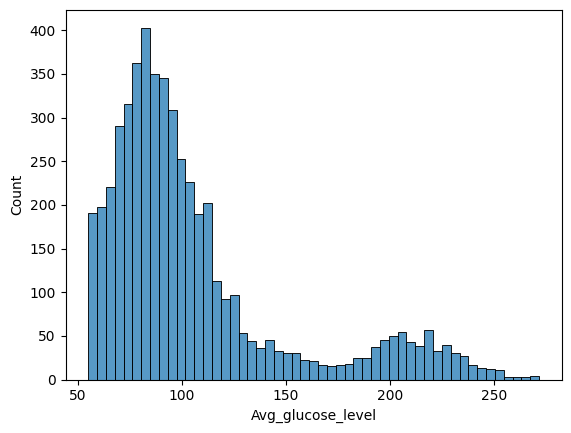

In [ ]:
#Creamos un histograma de Avg_glucose_level para analizar los datos
sns.histplot(df['Avg_glucose_level'])

<Axes: xlabel='Age', ylabel='Count'>

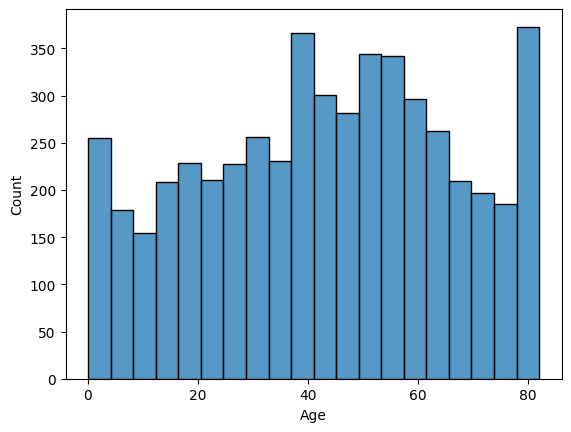

In [ ]:
#Creamos un histograma de Age para analizar los datos
sns.histplot(df['Age'])

<Axes: xlabel='Stroke', ylabel='Count'>

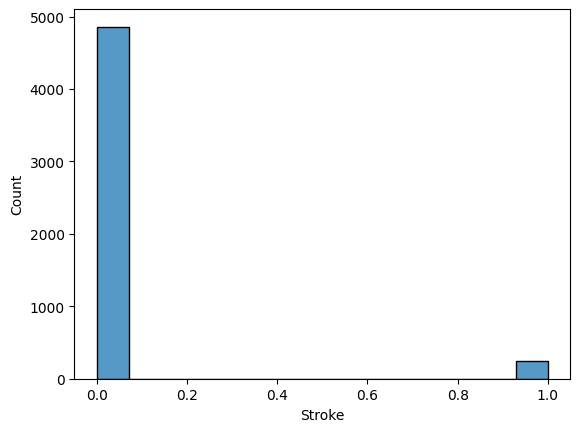

In [ ]:
#Creamos un histograma de Storke para analizar los datos
sns.histplot(df['Stroke'])

# 2. Unbalanced Dataset

## Undersampling

In [ ]:
#Agrupamos las variables de entrada
X = df[['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Age']].values

#Definimos la variable de salida
y = df[['Stroke']].values

#Balanceamos los datos usando undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [ ]:
#Imprimimos el tamaño de nuestro Dataset una vez hecho el balance de datos
print("Shape X:\n",X_resampled.shape, "\n")
print("Shape y:\n",y_resampled.shape, "\n")

Shape X:
 (498, 4) 

Shape y:
 (498,) 



El tamaño de nuestros datos se redujo a 498 filas y 5 columnas

## SMOTE

In [ ]:
#Agrupamos las variables de entrada
X = df[['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Age']].values

#Definimos las variables de salida
y = df[['Stroke']].values

#Hacemos SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_resampled_S, y_resampled_S = smote.fit_resample(X, y)

In [ ]:
#Imprimimos el tamaño de nuestro Dataset una vez hecho el balance de datos
print("Shape X:\n",X_resampled_S.shape, "\n")
print("Shape y:\n",y_resampled_S.shape, "\n")

Shape X:
 (9722, 4) 

Shape y:
 (9722,) 



Aumentamos el tamaño de nuestro set de datos a 9722 filas y 5 columnas

# 3. División de datos

Dividimos el set de datos en 70% el set de entrenamiento, 10% el set de validación y 20% el det de prueba

## Undersampling

In [ ]:
#Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

#Dividimos los datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

#Imprimimos el tamaño de cada conjunto de datos
print('Training X  : ', X_train.shape)
print('Validation X: ', X_val.shape)
print('Test X      :',X_test.shape)
print('Training Y  : ', y_train.shape)
print('Validation Y: ', y_val.shape)
print('Test Y      :',y_test.shape)

Training X  :  (348, 4)
Validation X:  (50, 4)
Test X      : (100, 4)
Training Y  :  (348,)
Validation Y:  (50,)
Test Y      : (100,)


## SMOTE

In [ ]:
#Dividimos los datos en conjunto de entrenamiento y prueba
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_resampled_S, y_resampled_S, test_size=0.2, random_state=1)

#Dividimos los datos en conjunto de entrenamiento y validación
X_train_S, X_val_S, y_train_S, y_val_S = train_test_split(X_train_S, y_train_S, test_size=0.125, random_state=1)

#Imprimimos el tamaño de cada conjunto de datos
print('Training X  : ', X_train_S.shape)
print('Validation X: ', X_val_S.shape)
print('Test X      :',X_test_S.shape)
print('Training Y  : ', y_train_S.shape)
print('Validation Y: ', y_val_S.shape)
print('Test Y      :',y_test_S.shape)

Training X  :  (6804, 4)
Validation X:  (973, 4)
Test X      : (1945, 4)
Training Y  :  (6804,)
Validation Y:  (973,)
Test Y      : (1945,)



# 4. Algoritmo de predicción con regresión logística

Podemos ver que ambos modelos, el de unersampling y SMOTE tienen casi los mismos resultados pero elegimos SMOTE para que nuestro set de datos no sea tan pequeña

## Under sampling


In [ ]:
# Creamos un objeto de regresión logística
lr = LogisticRegression()

# Entrenamos el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

# Predecimos la variable objetivo utilizando los datos de prueba
y_pred = lr.predict(X_test)

# Generamos un informe de clasificación para evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        45
           1       0.80      0.78      0.79        55

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



##SMOTE

### Matriz de evaluación

In [ ]:
# Creamos un objeto de regresión logística
lrs = LogisticRegression()

# Entrenamos el modelo con los datos de entrenamiento
lrs.fit(X_train_S, y_train_S)

# Predecimos la variable objetivo utilizando los datos de prueba
y_pred_S = lr.predict(X_test_S)

# Generamos un informe de clasificación para evaluar el rendimiento del modelo
print(classification_report(y_test_S, y_pred_S))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       964
           1       0.75      0.82      0.78       981

    accuracy                           0.77      1945
   macro avg       0.78      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



### Matriz de confusión

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
lrs.fit(X_train_S, y_train_S)

# Predecimos la variable objetivo utilizando los datos de prueba
y_pred_S = lr.predict(X_test_S)

# Calculamos la matriz de confusión
confusion = confusion_matrix(y_test_S, y_pred_S)

# Imprimimos la matriz de confusión
print(f'              {"Predicción: 0":^15}  {"Predicción: 1":^15} ')
print(f'{"Real 0":^11}  {confusion[0,0]:^15}   {confusion[0,1]:^15} ')
print(f'{"Real 1":^11}   {confusion[1,0]:^15}  {confusion[1,1]:^15} \n')

               Predicción: 0    Predicción: 1  
  Real 0           699               265       
  Real 1            177              804       



Podemos ver que este modelo predice mejor la clase 1

### Medidas de evaluación

In [ ]:
#Calculamos la exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular la precisión, la sensibilidad y especificidad
TN = confusion[0, 0]
TP = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
precision = TP / (TP + FP)
especificidad = TN / (TN + FP)
sensibilidad = TP / (TP + FN)

# Imprimir la precisión, la sensibilidad y especificidad
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)

Accuracy: 0.77
Precisión: 0.7521047708138447
Sensibilidad: 0.8195718654434251
Especificidad: 0.725103734439834


### AUC

In [ ]:
# Obtenemos las probabilidades predichas del modelo en los datos de prueba
y_pred_prob = lr.predict_proba(X_test_S)[:, 1]

# Calculamos el AUC
auc = roc_auc_score(y_test_S, y_pred_prob)

# Imprimimos el valor de AUC
print("AUC:", auc)

AUC: 0.8546681555360987


El AUC es alto lo que nos indica que el modelo puede diferenciar las clases de la variable de respuesta

### Curva ROC

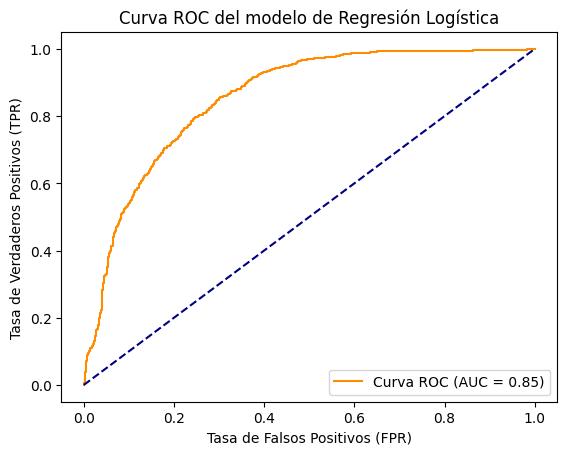

In [ ]:
# Obtenemos las probabilidades predichas del modelo en los datos de prueba
y_pred_prob = lr.predict_proba(X_test_S)[:, 1]

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_S, y_pred_prob)

# Trazamos la curva ROC
plt.plot(fpr, tpr,color='darkorange', label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Curva ROC del modelo de Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.show()

# 5. Algoritmos

## Red Neuronal

In [ ]:
#Generamos el modelo de red neuronal
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4))#input
model.add(tf.keras.layers.Dense(16, activation='relu'))#hidden
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))#output, softmax hace que la sumatoria de probabilidades de las dos categorias sea 1

#Optimizamos los parametros
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

#Monitoreamos accuracy de validacion y para de entrenar el modelo si no hay mejoras
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=6,restore_best_weights=True)

In [ ]:
#Entrenamos el modelo
model.fit(X_train_S,y_train_S,epochs=32,batch_size=32,callbacks=[early_stopping],validation_data=(X_val_S,y_val_S))

Epoch 1/32
213/213 [==============================] - 7s 6ms/step - loss: 2.7384 - accuracy: 0.5635 - auc: 0.5718 - val_loss: 0.6605 - val_accuracy: 0.5848 - val_auc: 0.6196
Epoch 2/32
213/213 [==============================] - 1s 6ms/step - loss: 0.6425 - accuracy: 0.6702 - auc: 0.7332 - val_loss: 0.6343 - val_accuracy: 0.6465 - val_auc: 0.7066
Epoch 3/32
213/213 [==============================] - 1s 5ms/step - loss: 0.6215 - accuracy: 0.6797 - auc: 0.7532 - val_loss: 0.6127 - val_accuracy: 0.6876 - val_auc: 0.8049
Epoch 4/32
213/213 [==============================] - 1s 4ms/step - loss: 0.6025 - accuracy: 0.6974 - auc: 0.7747 - val_loss: 0.5943 - val_accuracy: 0.7184 - val_auc: 0.7976
Epoch 5/32
213/213 [==============================] - 1s 5ms/step - loss: 0.5868 - accuracy: 0.7086 - auc: 0.7884 - val_loss: 0.5781 - val_accuracy: 0.7276 - val_auc: 0.8011
Epoch 6/32
213/213 [==============================] - 1s 4ms/step - loss: 0.5727 - accuracy: 0.7256 - auc: 0.7995 - val_loss: 0.56

In [ ]:
#Evaluamos el modelo
model.evaluate(X_test_S,y_test_S)

61/61 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7846 - auc: 0.8604


[0.4725293517112732, 0.7845758199691772, 0.8604201078414917]

Este modelo tiene una exactitud del 0.85

## KNN

In [ ]:
# Creamos un objeto KNN con K=5
knn = KNeighborsClassifier(n_neighbors=5)

# entrenamos el modelo con los datos de entrenamiento
knn.fit(X_train_S, y_train_S)

# realizamos predicciones en los datos de prueba
y_pred = knn.predict(X_test_S)

# evaluamos la precisión del modelo
accuracy = accuracy_score(y_test_S, y_pred_S)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7727506426735219


## Ensamble

Creamos un modelo de ensamble con arboles de decisión como base

In [ ]:
# Creamos un arbol de decisiones
dtc = DecisionTreeClassifier()

# Creamos un bagging classifier con arbol de decisiones como base
bagging = BaggingClassifier(base_estimator=dtc, n_estimators=10, random_state=0)

# Ajustamos el modelo con los datos
bagging.fit(X_train_S, y_train_S)

# Evaluamos el modelo
score = bagging.score(X_test_S, y_test_S)
print("Bagging score:", score)

Bagging score: 0.9295629820051414


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Matriz de confusión

In [ ]:
# Calculamos la matriz de confusión
confusion = confusion_matrix(y_test_S, y_pred_S)

# Imprimimos la matriz de confusión
print(f'              {"Predicción: 0":^15}  {"Predicción: 1":^15} ')
print(f'{"Real 0":^11}  {confusion[0,0]:^15}   {confusion[0,1]:^15} ')
print(f'{"Real 1":^11}   {confusion[1,0]:^15}  {confusion[1,1]:^15} \n')

               Predicción: 0    Predicción: 1  
  Real 0           699               265       
  Real 1            177              804       



Este modelo predice mejor la clase 1 que la clase 0 de la variable de respuesta

### Matriz de evaluación

In [ ]:
# Calculamos la matriz de confusión
confusion = confusion_matrix(y_test_S, y_pred)

# Calculamos la exactitud, precisión, especificidad y sensibilidad
TN, FP, FN, TP = confusion.ravel()
exactitud = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)

# Imprimimos las métricas
print("Exactitud:", exactitud)
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)

Exactitud: 0.8447300771208226
Precisión: 0.7965065502183406
Sensibilidad: 0.9296636085626911
Especificidad: 0.758298755186722


In [ ]:
# Generamos un informe de clasificación para evaluar el rendimiento del modelo
print(classification_report(y_test_S, y_pred_S))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       964
           1       0.75      0.82      0.78       981

    accuracy                           0.77      1945
   macro avg       0.78      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



### AUC

In [ ]:
# Obtenemos las probabilidades predichas del modelo en los datos de prueba
y_pred_prob = bagging.predict_proba(X_test_S)[:, 1]

# Calculamos el AUC de la curva ROC
auc = roc_auc_score(y_test_S, y_pred_prob)

print("AUC de la curva ROC:", auc)

AUC de la curva ROC: 0.9724231350006979


### Curva ROC 

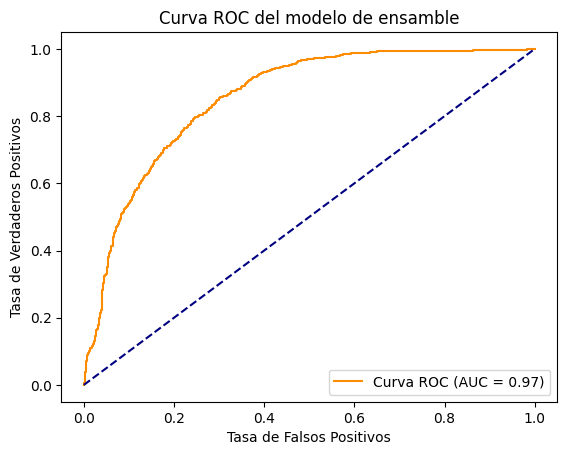

In [ ]:
# Graficamos la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo de ensamble')
plt.legend(loc="lower right")
plt.show()

# Optimizacion de hyperparametros

## Red Neuronal

In [ ]:
#Creamos el modelo
def create_model(num_layers=1, num_neurons=16):
    model= tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(4))#input
    for i in range(num_layers):
      model.add(tf.keras.layers.Dense(num_neurons, activation='sigmoid'))#hidden
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))#output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
    return model

#Creamos los hyperparametros del entrenamiento como epoch y batchsize
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

#Generamos los hyperparametros que se van a optimizar
param_grid = {
    'num_layers': [1, 2, 3],
    'num_neurons': [16, 32, 64],
}

# Probamos el modelo con cada hyperparámetro
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

<ipython-input-92-92110e6a5ab9>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


In [ ]:
#Entrenamostodos los modelos para encontrar los mejores hyperparametros
grid_result = grid.fit(X_train_S, y_train_S)

In [ ]:
# Creamos un modelo con los mejores hyperparametros
modelOpt=create_model(grid_result.best_params_['num_layers'],grid_result.best_params_['num_neurons'])

#Lo entrenamos igual que antes
modelOpt.fit(X_train_S,y_train_S,epochs=32,batch_size=32,callbacks=[early_stopping],validation_data=(X_val_S,y_val_S))

Epoch 1/32
213/213 [==============================] - 2s 5ms/step - loss: 0.6111 - accuracy: 0.6906 - auc_2: 0.7428 - val_loss: 0.5679 - val_accuracy: 0.6968 - val_auc_2: 0.7987
Epoch 2/32
213/213 [==============================] - 1s 5ms/step - loss: 0.5416 - accuracy: 0.7371 - auc_2: 0.8099 - val_loss: 0.5480 - val_accuracy: 0.7030 - val_auc_2: 0.8493
Epoch 3/32
213/213 [==============================] - 1s 6ms/step - loss: 0.5170 - accuracy: 0.7478 - auc_2: 0.8203 - val_loss: 0.5156 - val_accuracy: 0.7441 - val_auc_2: 0.8229
Epoch 4/32
213/213 [==============================] - 1s 5ms/step - loss: 0.4973 - accuracy: 0.7619 - auc_2: 0.8364 - val_loss: 0.5078 - val_accuracy: 0.7420 - val_auc_2: 0.8370
Epoch 5/32
213/213 [==============================] - 1s 4ms/step - loss: 0.4884 - accuracy: 0.7640 - auc_2: 0.8363 - val_loss: 0.4770 - val_accuracy: 0.7760 - val_auc_2: 0.8560
Epoch 6/32
213/213 [==============================] - 1s 4ms/step - loss: 0.4813 - accuracy: 0.7700 - auc_2: 0

In [ ]:
#Evaluamos el modelo
modelOpt.evaluate(X_test_S,y_test_S)

61/61 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7763 - auc_2: 0.8536


[0.46646225452423096, 0.7763496041297913, 0.8535768985748291]

El modelo de Redes Neuronales tiene una exactitud de 0.86

### Matriz de confusión

In [ ]:
# Obtenemos las predicciones del modelo en el conjunto de prueba
y_pred=tf.keras.backend.round(modelOpt.predict(X_test_S))#redondeamos porque la activasion sigmoide retorna valores entre 0 y 1

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test_S, y_pred)

# mostramos la matriz de confusión
print(f'              {"Predicción: 0":^15}  {"Predicción: 1":^15} ')
print(f'{"Real 0":^11}  {cm[0,0]:^15}   {cm[0,1]:^15} ')
print(f'{"Real 1":^11}   {cm[1,0]:^15}  {cm[1,1]:^15} \n')

61/61 [==============================] - 0s 1ms/step
               Predicción: 0    Predicción: 1  
  Real 0           661               303       
  Real 1            132              849       



Este modelo predice mejor la clase 1 de la varibale de respuesta

In [ ]:
# Calculamos el classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_S, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       964
           1       0.74      0.87      0.80       981

    accuracy                           0.78      1945
   macro avg       0.79      0.78      0.77      1945
weighted avg       0.78      0.78      0.77      1945



In [ ]:
#Calculamos la exactitud, sensibilidad, precisión y especificidad
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

exactitud = (TP + TN) / (TP + TN + FP + FN)
sensibilidad = TP / (TP + FN)
precision = TP / (TP + FP)
especificidad = TN / (TN + FP)

#Imprimimos los resultados
print(f'Exactitud: {exactitud:.3f}')
print(f'Sensibilidad: {sensibilidad:.3f}')
print(f'Precisión: {precision:.3f}')
print(f'Especificidad: {especificidad:.3f}')

Exactitud: 0.776
Sensibilidad: 0.865
Precisión: 0.737
Especificidad: 0.686


### AUC

In [ ]:
#Sacamos el AUC
loss, accuracy, auc=modelOpt.evaluate(X_test_S, y_test_S)

61/61 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7763 - auc_2: 0.8536


Tiene un AUC de 0.86

### Curva ROC

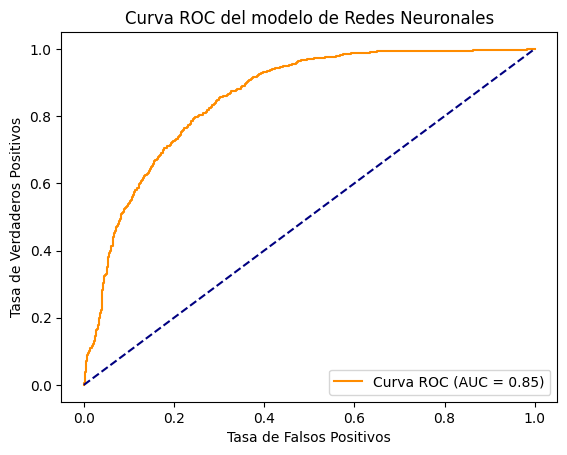

In [ ]:
# Graficamos la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo de Redes Neuronales')
plt.legend(loc="lower right")
plt.show()

## KNN

In [ ]:
# definimos una cuadrícula de valores para los hiperparámetros
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# creamos un objeto Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# entrenamos el modelo con los datos de entrenamiento y validación
grid_search.fit(X_train_S, y_train_S)

# obtenemos los mejores hiperparámetros y la puntuación de validación cruzada
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# entrenamos un modelo con los mejores hiperparámetros utilizando los datos de entrenamiento y validación
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
knn.fit(X_train_S, y_train_S)

# evaluamos el modelo en los datos de prueba
y_pred = knn.predict(X_test_S)
accuracy = accuracy_score(y_test_S, y_pred)

# mostramos los resultados
print('Mejores hiperparámetros:', best_params)
print('Puntuación de validación cruzada:', best_score)
print('Precisión en los datos de prueba:', accuracy)

Mejores hiperparámetros: {'n_neighbors': 5, 'weights': 'distance'}
Puntuación de validación cruzada: 0.869049466222933
Precisión en los datos de prueba: 0.8591259640102827


### Evaluación del modelo

In [ ]:
# calculamos la matriz de confusión
cm = confusion_matrix(y_test_S, y_pred)

# mostramos la matriz de confusión
print(f'              {"Predicción: 0":^15}  {"Predicción: 1":^15} ')
print(f'{"Real 0":^11}  {cm[0,0]:^15}   {cm[0,1]:^15} ')
print(f'{"Real 1":^11}   {cm[1,0]:^15}  {cm[1,1]:^15}')

               Predicción: 0    Predicción: 1  
  Real 0           753               211       
  Real 1            63               918      


Este modelo predice mejor la clase 1 de la variable de respuesta

### Evaluar el modelo

In [ ]:
# Calculamos el classification report
y_pred = knn.predict(X_test_S)
print(classification_report(y_test_S, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       964
           1       0.81      0.94      0.87       981

    accuracy                           0.86      1945
   macro avg       0.87      0.86      0.86      1945
weighted avg       0.87      0.86      0.86      1945



In [ ]:
#Calculamos la exactitud, sensibilidad, precisión y especificidad
exactitud = (cm[0,0] + cm[1,1]) / sum(sum(cm))
precision = cm[1,1] / (cm[1,1] + cm[0,1])
sensibilidad = cm[1,1] / (cm[1,1] + cm[1,0])
especificidad = cm[0,0] / (cm[0,0] + cm[0,1])

#Imprimimos los resultados
print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Sensibilidad: {sensibilidad:.2f}')
print(f'Especificidad: {especificidad:.2f}')

Exactitud: 0.86
Precisión: 0.81
Sensibilidad: 0.94
Especificidad: 0.78


### AUC

In [ ]:
# obtenemos las probabilidades de predicción para los datos de prueba
y_score = knn.predict_proba(X_test_S)[:,1]

# calculamos la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_S, y_score)
roc_auc = auc(fpr, tpr)

# mostramos el AUC
print('AUC:', roc_auc)

AUC: 0.9269428265678599


### Curva ROC

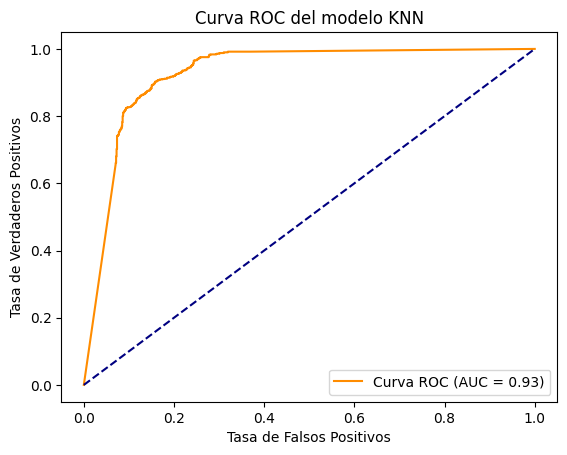

In [ ]:
# Graficamos la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo KNN')
plt.legend(loc="lower right")
plt.show()

# Random Forest

Volvemos a hacer la limpieza de datos con el dataframe original

In [ ]:
# cargamos los datos en un DataFrame de pandas
encoding = 'ISO-8859-1'
df = pd.read_csv("/content/PublicHospitalDataset.csv",encoding=encoding)

#Cambiamos la edad a enteros
df['Age'] = df['Age'].astype(int)

#Eliminamos los datos que no deberían ir en Work
df_clean=df[df["Work"]!="k\x96sdh-k"]
df_clean=df_clean[df_clean["Work"]!="sdsd-i"]
df_clean=df_clean[df_clean["Work"]!="dsfsdf"]
df_clean=df_clean[df_clean["Work"]!="sdfsdf"]

#Eliminamos las entradas de Otro en Género
df_clean=df_clean[df_clean["Gender"]!="Other"]

#Eliminamos los datos que dicen Unknown en Smoking
df_clean=df_clean[df_clean["Smoking"]!="Unknown"]

#Eliminamos las entradas de 40000 en Bmi
df_clean=df_clean[df_clean["Bmi"]<=70]

#Cambiamos el nombre del dataset limpio a df
df=df_clean

#Cambiamos las variables categóricas que tienen 2  niveles a labeling encoding
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Residence'] = df['Residence'].map({'Rural': 1, 'Urban': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

#Cambiamos el nombre de Residencia a rural para comprender mejor el modelo
df = df.rename(columns={'Residence': 'Rural'})

#Creamos variables Dummies en Work
Dummies = pd.get_dummies(df['Work'])
df = pd.concat([df, Dummies], axis=1)

#Creamos variables Dummies en smoking
Dummies = pd.get_dummies(df['Smoking'])
df = pd.concat([df, Dummies], axis=1)

#Eliminamos la columna de Work y Smoking
df=df.drop(['Work'],axis=1)
df=df.drop(['Smoking'],axis=1)

#Eliminamos los valores nulos de la columna bmi
df["Bmi"] = pd.to_numeric(df["Bmi"],errors = "coerce")
df = df.dropna(subset = ["Bmi"])

df

,Hypertension,Heart Disease,Married,Rural,Avg_glucose_level,Bmi,Gender,Age,Stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1,1,0,228.69,36.6,0,67,1,0,0,1,0,0,1,0,0
2,0,1,1,1,105.92,32.5,0,80,1,0,0,1,0,0,0,1,0
3,0,0,1,0,171.23,34.4,1,49,1,0,0,1,0,0,0,0,1
4,1,0,1,1,174.12,24.0,1,79,1,0,0,0,1,0,0,1,0
5,0,0,1,0,186.21,29.0,0,81,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,0,0,1,1,76.62,28.2,0,57,0,1,0,0,0,0,0,1,0
5100,1,0,1,1,71.97,28.3,0,82,0,0,0,0,1,0,0,1,0
5102,0,0,1,1,77.93,21.7,1,57,0,0,0,1,0,0,0,1,0
5107,0,0,1,1,82.99,30.6,1,35,0,0,0,0,1,0,0,1,0


In [ ]:
# dividimos los datos en variables predictoras y variable objetivo
X = df.drop("Stroke", axis=1)
y = df["Stroke"]

# creamos un objeto Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# ajustamos el modelo a los datos
rf.fit(X, y)

# obtenemos la importancia de cada variable
importances = rf.feature_importances_

# ordenamos las variables por importancia descendente
indices = np.argsort(importances)[::-1]

# mostramos las variables y sus importancias
for i in range(X.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[indices[i]], importances[indices[i]]))

1. Avg_glucose_level (0.277094)
2. Bmi (0.245493)
3. Age (0.231691)
4. Rural (0.038128)
5. Gender (0.031032)
6. Hypertension (0.029849)
7. Heart Disease (0.024079)
8. Private (0.019604)
9. Married (0.019504)
10. Self-employed (0.018861)
11. never smoked (0.017995)
12. formerly smoked (0.017383)
13. smokes (0.015655)
14. Govt_job (0.013540)
15. children (0.000089)
16. Never_worked (0.000002)


Las variables que predicen mejor la variable de respuesta son el nivel de glucosa, Bmi y la edad